# Importing libraries

In [ ]:
# libraries 
!pip install shap
import pandas as pd
import numpy as np
import shap 
import graphviz
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/gdrive')
RSEED = 50

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 5.8 MB/s eta 0:00:00
Mounted at /content/gdrive


# Loading Data

In [ ]:
# Read the given CSV file, and view some sample records
cancer = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/cervicalCancer.csv")

# Exploring Data

## Number of obervations and Features

In [ ]:
cancer.shape

(72, 20)

## First 5 obsevations

In [ ]:
cancer.head(5)

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


## Information about data

In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHygine     72 non-null     int64
 3   intention_aggregation       72 non-null     int64
 4   intention_commitment        72 non-null     int64
 5   attitude_consistency        72 non-null     int64
 6   attitude_spontaneity        72 non-null     int64
 7   norm_significantPerson      72 non-null     int64
 8   norm_fulfillment            72 non-null     int64
 9   perception_vulnerability    72 non-null     int64
 10  perception_severity         72 non-null     int64
 11  motivation_strength         72 non-null     int64
 12  motivation_willingness      72 non-null     int64
 13  socialSupport_emotionality  72 non-null     int64
 14  socialSuppor

## Summary of data

In [ ]:
cancer.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


## Number of values in eaxh class of target variables

In [ ]:
cancer['ca_cervix'].value_counts()

0    51
1    21
Name: ca_cervix, dtype: int64

In [ ]:
X = cancer.drop('ca_cervix', axis=1)
y = cancer['ca_cervix']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (72, 19)
Shape of y: (72,)


## Oversampling of minority class using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))
sm = SMOTE(random_state=2)
X, y= sm.fit_resample(X, y.ravel())
print('After OverSampling, the shape of X: {}'.format(X.shape))
print('After OverSampling, the shape of y: {} \n'.format(y.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y==0)))

Before OverSampling, counts of label '1': 21
Before OverSampling, counts of label '0': 51 

After OverSampling, the shape of X: (102, 19)
After OverSampling, the shape of y: (102,) 

After OverSampling, counts of label '1': 51
After OverSampling, counts of label '0': 51


# Creating a model

## Splitting X and y into train and test

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (71, 19)
Number transactions y_train dataset:  (71,)
Number transactions X_test dataset:  (31, 19)
Number transactions y_test dataset:  (31,)


## Training the model

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

## Finding the number of nodes and maximum depths

In [ ]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 16
Average maximum depth 5


## Prediction on X_train and X_test using the model the model

In [ ]:
train_rf_predictions = model.predict(X_train)
train_rf_probs = model.predict_proba(X_train)[:, 1]

rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


## Evaluating the model using the metrics, precision and recall 

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

## Evaluating the model using ROC curve

Recall Baseline: 1.0 Test: 1.0 Train: 1.0
Precision Baseline: 0.52 Test: 1.0 Train: 1.0
Roc Baseline: 0.5 Test: 1.0 Train: 1.0


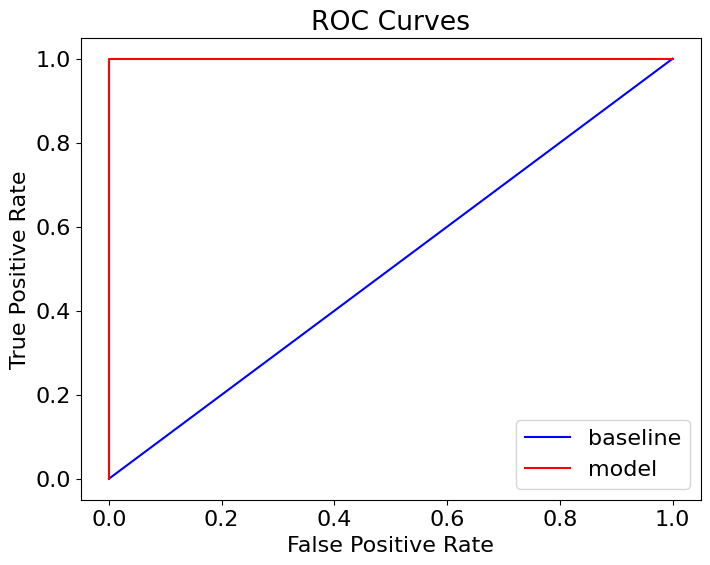

In [ ]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

## Visualizing metrics using confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[15  0]
 [ 0 16]]


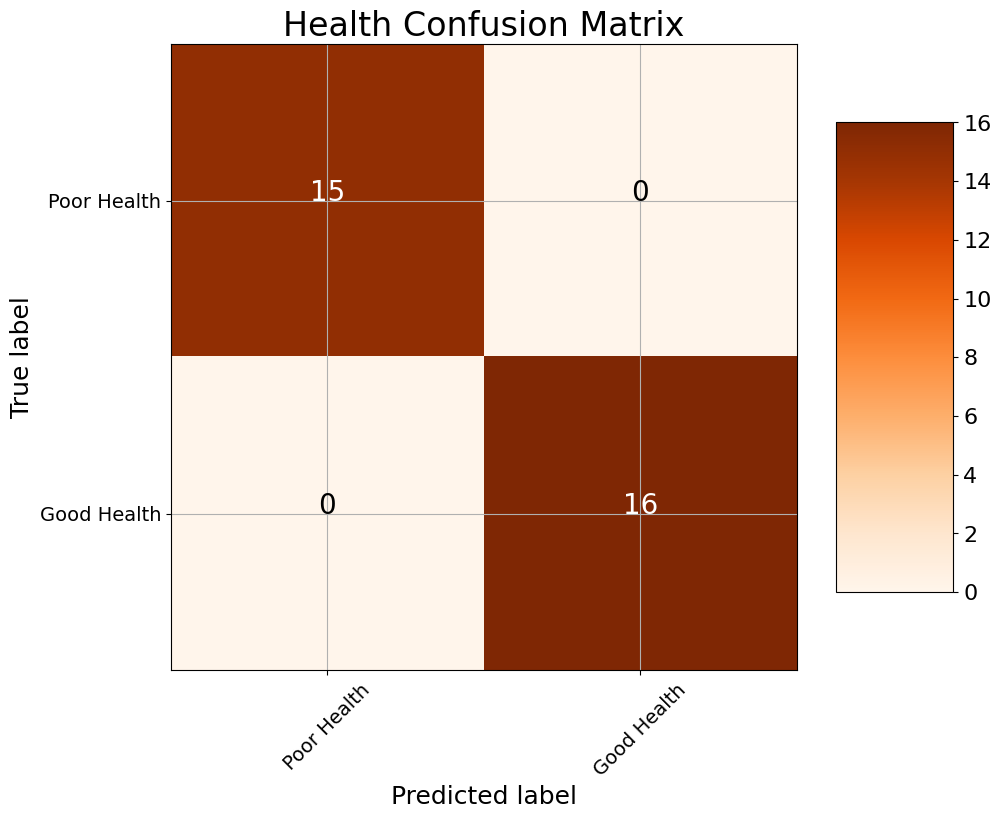

In [ ]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
                      title = 'Health Confusion Matrix')

## Features in X_train

In [ ]:
X_train.columns

Index(['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygine',
       'intention_aggregation', 'intention_commitment', 'attitude_consistency',
       'attitude_spontaneity', 'norm_significantPerson', 'norm_fulfillment',
       'perception_vulnerability', 'perception_severity',
       'motivation_strength', 'motivation_willingness',
       'socialSupport_emotionality', 'socialSupport_appreciation',
       'socialSupport_instrumental', 'empowerment_knowledge',
       'empowerment_abilities', 'empowerment_desires'],
      dtype='object')

## Feature Importance
### Plotting the features in the order of their importance in the model output

In [ ]:

features = list(X_train.columns)
fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

fi_model.head(10)

,feature,importance
10,perception_severity,0.145328
17,empowerment_abilities,0.110727
16,empowerment_knowledge,0.088285
8,norm_fulfillment,0.084514
18,empowerment_desires,0.080933
12,motivation_willingness,0.070172
3,intention_aggregation,0.068182
9,perception_vulnerability,0.054651
2,behavior_personalHygine,0.051475
11,motivation_strength,0.037381


## Finding best parameter values using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200])},
                   random_state=50, scoring='roc_auc', verbose=1)

## Best Parameter Values

In [ ]:
rs.best_params_

{'n_estimators': 83,
 'min_samples_split': 5,
 'max_leaf_nodes': 22,
 'max_features': 0.6,
 'max_depth': 8,
 'bootstrap': True}

# Use Best Model to train the data and predict the outcome


In [ ]:
best_model = rs.best_estimator_
train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

## Finding number of nodes and maximum depths after optimization

In [ ]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 11
Average maximum depth 3


Recall Baseline: 1.0 Test: 1.0 Train: 1.0
Precision Baseline: 0.52 Test: 0.94 Train: 1.0
Roc Baseline: 0.5 Test: 1.0 Train: 1.0


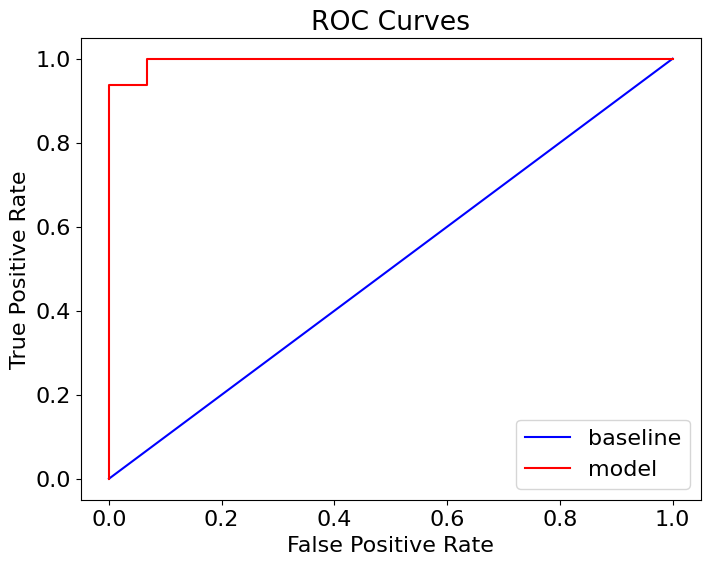

In [ ]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

The optimized model achieves around the same performance as the default model. More random search iterations could improve performance, or it's possible that we are close the limit of what the random forest can achieve for this problem.

# Visualizing the results

## Feature importance

In [ ]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

print(*X_train.columns[sorted_indices], sep = "\n")

perception_severity
empowerment_abilities
empowerment_knowledge
norm_fulfillment
empowerment_desires
motivation_willingness
intention_aggregation
perception_vulnerability
behavior_personalHygine
motivation_strength
socialSupport_instrumental
socialSupport_emotionality
socialSupport_appreciation
norm_significantPerson
intention_commitment
behavior_eating
attitude_spontaneity
attitude_consistency
behavior_sexualRisk


<Axes: >

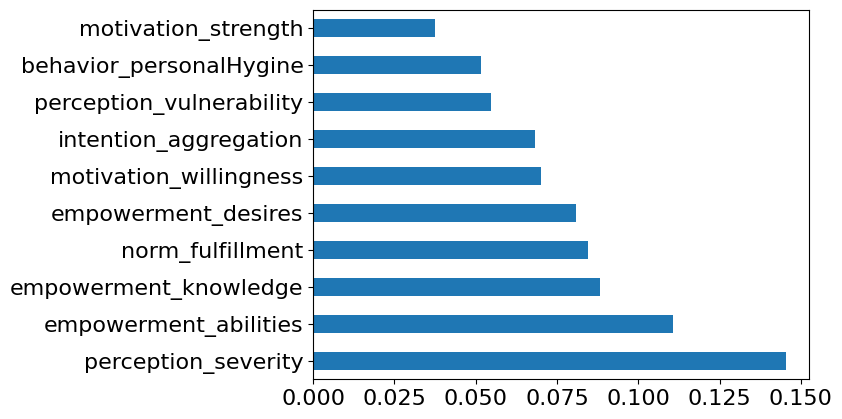

In [ ]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh'))  

#Analysing Interactions with SHAP


SHAP values (SHapley Additive exPlanations) is a method based on cooperative game theory

It is used to increase transparency and interpretability of machine learning models.

SHAP values help us to  understand which features are most important to the prediction. 
SHAP importance is measured at row level. 

It represents how a feature influences the prediction of a single row relative to the other features in that row and to the average outcome in the dataset.

## Calculating SHAP interaction values

In [ ]:
#To calculate the SHAP interaction values, we define an explainer by passing our model to the TreeExplainer function. 
#This function is used to explain the output of ensemble tree models. 
explainer = shap.TreeExplainer(model)

#To get the interaction values. This will return an array, shap_interaction, which contains one record for each of the observations in our X_test feature matrix.
shap_values = explainer.shap_values(X_test)

# To understand structure , get the shape of shap_value
print("Shape of SHAP values",np.shape(shap_values))

# SHAP interaction values for first record for each of 31 observations in X_test feature
#pd.DataFrame(shap_values[0],columns=X.columns) #index=X.columns ### need more clarification
#shap_values


Shape of SHAP values (2, 31, 19)


Shape of an array is (2, 31, 19). This means that array contains 2, 31 x 19 matrices. Here 31 x 19 matrices is referred as contribution matrices. The matrix tells us how much each factor contributed to the model's prediction when compared to the mean prediction. This is a similar interpretation to standard SHAP values except the contributions are broken down into main and interaction effects. The main effects are given on the diagonals.The interaction effects are given on the off diagonals. 

In [ ]:
#Get model predictions
y_pred = model.predict(X_test)


#Sum of interaction values for first employee
sum_shap = np.sum(shap_values[1])

#Values below should be the same
print("Model prediction: {}".format(y_pred[0]))
print("shap_value", sum_shap)

Model prediction: 0
shap_value -0.47929577464788686


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


# SHAP Summary Plot

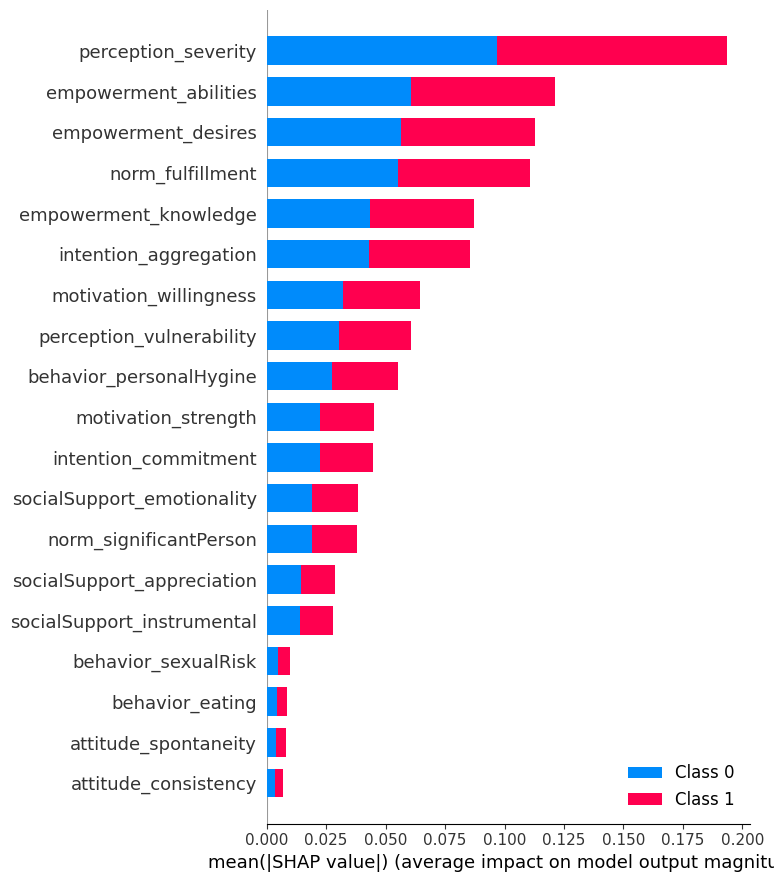

In [ ]:
fig = plt.figure()
#sns.set_style('darkgrid') 
shap.summary_plot(shap_values, X_test)


In [ ]:
np.shape(shap_values[0])

(31, 19)

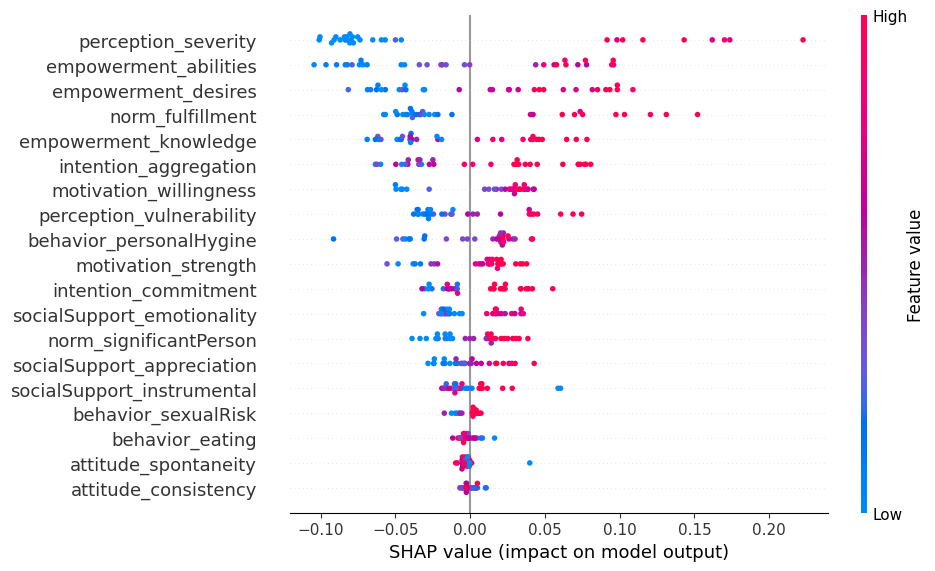

In [ ]:
fig = plt.figure()
#sns.set_style('darkgrid') 
shap.summary_plot(shap_values[0], X_test, show=False)
plt.gcf().set_size_inches(10,6)
plt.tight_layout()
plt.show()


1.  Summary plots brings the whole data to a single plot.In this, we observe the  indications of the relationship between the value of a feature and the impact on the prediction. 
2.  All of the features are listed in y-axis in the rank order, the top one being the most contributor to the predictions and the bottom one being the least or zero-contributor. 
3.  Shap values are provided in the x-axis.
4.  A value of zero represents no contribution whereas contributions increase as the shap value moves away from zero. If the feature'sshap value is zero 
5.  Each circular dot in the plot represents a single data point, then in the linear model feature's weight would be 0.
6.  Color of the dot denotes the value of that corresponding feature. Here blue represents '0' and red represents '1' 
7.  For the feature'perception_severity', higher the value, higher the chances of having cervical cancer. Lower value of 'perception_severity', lower the  chance of having cervical cancer.





#Dependence Plot(Global Interpretation)
#### To see the exact form of the relationship, we have to look at SHAP dependence plots. SHAP feature dependence might be the simplest global interpretation plot: 1) Pick a feature. 2) For each data instance, plot a point with the feature value on the x-axis and the corresponding Shapley value on the y-axis. 3) Done.

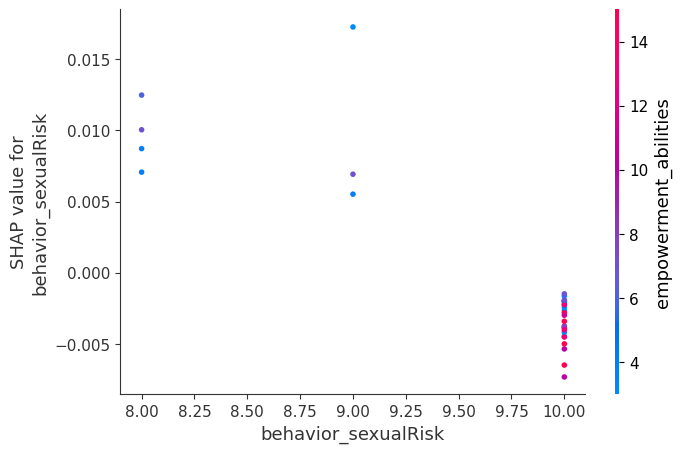

In [ ]:
shap_values = explainer.shap_values(X_test)
shap.dependence_plot('behavior_sexualRisk', shap_values[1], X_test) 


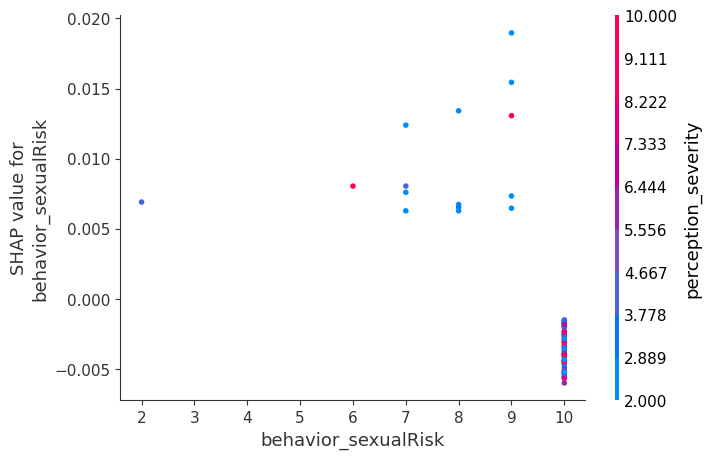

In [ ]:
# we use whole of X data from more points on plot
shap_values = explainer.shap_values(X_train)
shap.dependence_plot('behavior_sexualRisk', shap_values[1], X_train, interaction_index ="perception_severity") 


# SHAP Force Plot
### Force plots are suitable for row-wise SHAP analysis. It takes in a single row and shows in a rank order how each of the features contributed to the prediction.

In [ ]:
# obtain shap values for the first row of the test data
shap.initjs()
explainer = shap.TreeExplainer(model) #
shap_values = explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0]) 
#explainer.expected_value[1] = the base value w.r.t the positive class. 
#shap_values[1][0] = the shap value w.r.t to the positive class and 1st observation. 
#X_train_df.iloc[0,:] = values of the 1st observation from the training dataset.

In the plot above, output = 0.30 is the model’s score for this observation. 
The base value is the mean predicted value of the model which is 0.5013.
The features that were important to making the prediction for this observation are shown in red and blue, with red representing features that pushed the model score higher, and blue representing features that pushed the score lower. Features that had more of an impact on the score are located closer to the dividing boundary between red and blue, and the size of that impact is represented by the size of the bar.

So for this particular example , it was ultimately classified as 0, because they were pushed higher by all the factors shown in blue

In [ ]:
# obtain shap values for the first row of the test data
shap.initjs()

shap_values = explainer.shap_values(X_test.iloc[30])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[30]) 

In [ ]:
shap.initjs() 

shap_values = explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0])

In [ ]:
shap.initjs() 
shap_values = explainer.shap_values(X_test.iloc[20])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[20])

#### Force plots can be made interactive by plotting it with more data points. Here we plotted it with all of the test data. By hovering mouse pointer over the regions of plot, we can observe shap values interactively.

#### Dropdown options are shown in the interactive plot to select features of interest. It gives a better understanding on how two different features interact with each other in predicting the outputs. It should be noted that, the red and blue colors show positive and negative predictions respectively.



In [ ]:
# obtain shap values for the test data
shap.initjs()
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test) 


# Shap Decision Plot

As the summary plot, it gives an overall picture of contribution to prediction. From bottom to top of the decision plot, shap values are cumulatively added to the base value of the model in determining the output values. It can be observed that certain strings colored in blue resulted in final class value 0 and the remaining strings colored in red resulted in final class value 1.

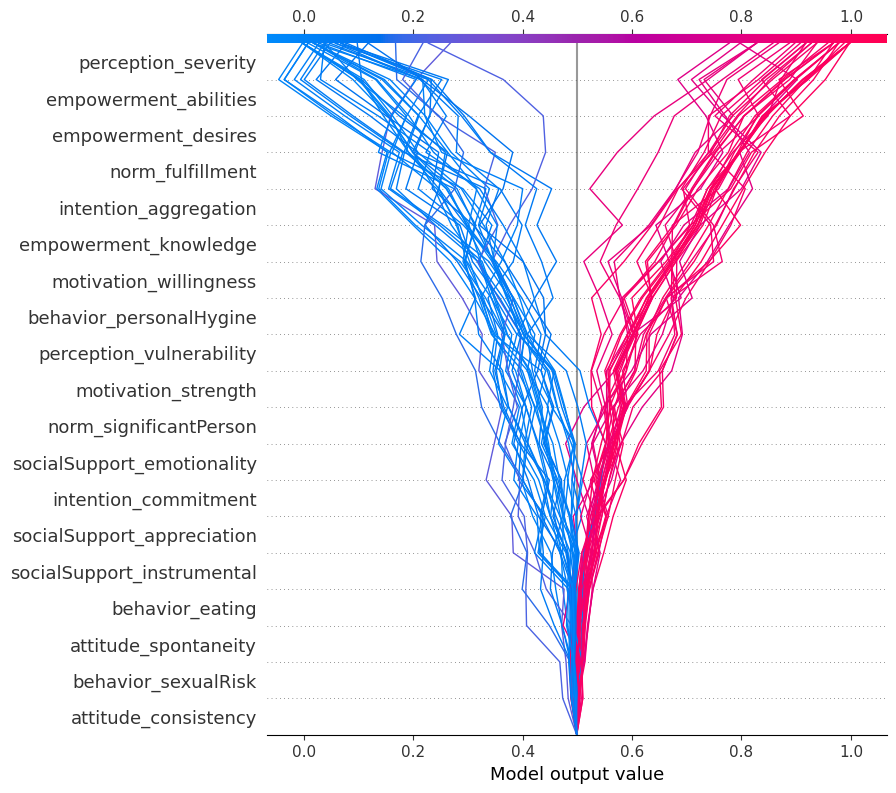

In [ ]:
shap.decision_plot(explainer.expected_value[0], shap_values[1], X_train)
# link='logit', highlight=0
#shap.decision_plot(explainer.expected_value[0], shap_values[1], X_train, link='logit', highlight=0)

SHAP analysis can be used to interpret or explain a machine learning model. Also, it can be done as part of feature engineering to tune the model’s performance or generate new features!